In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import scipy.linalg as la

from sklearn.neighbors import KNeighborsClassifier


In [2]:
# load data

iris_data = np.loadtxt('iris.txt')
iris_data = np.expand_dims(iris_data, axis=2)


data = iris_data[:, :4]
label = iris_data[:, 4]

In [5]:
print(data.shape)
print(label.shape)

(150, 4, 1)
(150, 1)


In [142]:
# step 1: calculate the covariance matrix, and solve eigenvalues and eigenvectors
# (See ./utility.get_eigenvalue_and_eigenvectors())
from utility import get_eigenvalue_and_eigenvectors

eigenvalues, eigenvectors = get_eigenvalue_and_eigenvectors(iris_data[:, 0:4, 0])

In [143]:
eigenvalues

array([1.77635684e-15+0.j, 1.81553173e+01+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j])

In [144]:
eigenvectors

array([[[-8.66025404e-01],
        [ 5.00000000e-01],
        [-8.47050736e-19],
        [-8.47050736e-19]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [-5.77350269e-01],
        [-5.77350269e-01]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [ 7.88675135e-01],
        [-2.11324865e-01]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [-2.11324865e-01],
        [ 7.88675135e-01]]])

In [137]:
# step 2: project data onto each eigenvector, and get accuracy by using k-NN model and 2-fold cross validation 
# (See ./utility.pca() and ./utility.two_fold_cross_validation())
from utility import pca, two_fold_cross_validation, get_accuracy

for eigenvector_index in range(eigenvectors.shape[0]):
    accuracy = get_accuracy(data, label, eigenvectors[eigenvector_index])
    print("Accuracy that project data onto eigenvector {} is : {}%".format(eigenvector_index, accuracy))

Accuracy that project data onto eigenvector 0 is : 0.8400000000000001%
Accuracy that project data onto eigenvector 1 is : 0.9466666666666667%
Accuracy that project data onto eigenvector 2 is : 0.8200000000000001%
Accuracy that project data onto eigenvector 3 is : 0.5666666666666667%


In [138]:
# step 3 ~ 5: project data onto eigenvectors that top two eigenvalues

top_eigenvalues = np.argsort(eigenvalues)
for top_i in range(2, 4 + 1, 1):
    accuracy = get_accuracy(data, label, eigenvectors[:, top_eigenvalues[0:top_i]])
    print("Accuracy is {}% when data are projected onto eigenvectors V: {}\n".format(accuracy, top_eigenvalues[0:top_i]))

Accuracy is 0.94% when data are projected onto eigenvectors V: [2 3]

Accuracy is 0.96% when data are projected onto eigenvectors V: [2 3 0]

Accuracy is 0.94% when data are projected onto eigenvectors V: [2 3 0 1]



[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

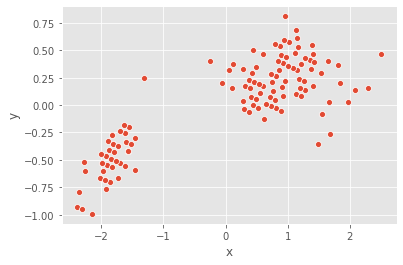

In [139]:
# step 6: plotting 2-d data using PCA scatter plot

pca_data = pca(data, eigenvectors[:, top_eigenvalues[0:2]]).T

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1]).set(xlabel="x", ylabel="y")